# Homework 1

In [1]:
import matplotlib .pyplot as plt
import pandas as pd

## Analyze "players.csv" , "pitching.csv", "teams.csv" ~ Question 2

## Read the Dataframe

In [2]:
pitching_df = pd.read_csv('pitching.csv')
players_df = pd.read_csv('players.csv')
teams_df = pd.read_csv('teams.csv')

### Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.

In [3]:
df_wins = teams_df[((teams_df['yearID']>=2011) & 
                   (teams_df['yearID']<=2015))]
wins_team_df = df_wins.sort_values('W', ascending = False).groupby(['teamID'])[['W']].sum()
wins_team_df.sort_values('W', ascending = False)

,W
teamID,
SLN,465
NYA,448
LAN,446
WAS,443
DET,440
LAA,436
TEX,435
PIT,431
TBA,430


### Computinfg the loss as well for better analysis ~ Not Related to homework

In [4]:
df_loss = teams_df[((teams_df['yearID']>=2011) & 
                   (teams_df['yearID']<=2015))]
loss_team_df = df_loss.sort_values('L', ascending = False).groupby(['teamID'])[['L']].sum()
loss_team_df.sort_values('L', ascending = False)

,L
teamID,
HOU,492
COL,465
MIN,462
CHN,442
SDN,436
CHA,434
SEA,434
PHI,418
NYN,416


### Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order

In [5]:
specific_years_players_df = players_df[((players_df['yearID']>=2011) & 
                   (players_df['yearID']<=2015))].dropna()
players_payroll_df = specific_years_players_df.groupby(['teamID', 'yearID'], as_index = True)[['salary']].sum()
team_payroll_df = players_payroll_df.groupby(['teamID'])[['salary']].mean()
team_payroll_df.sort_values('salary', ascending = False)

,salary
teamID,
NYA,204717513.4
LAN,170401274.0
PHI,161337694.6
BOS,154501998.4
SFN,139546203.4
DET,138945996.2
LAA,130569249.4
TEX,115163137.2
WAS,109018298.6


### Create a visualization of your choice which will all allow you to show whether a team’s winning record is related to its payroll.

<AxesSubplot:xlabel='teamID'>

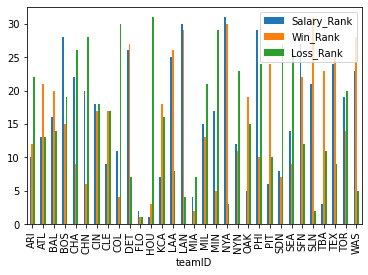

In [6]:
compare_df = pd.DataFrame()
compare_df['Salary_Rank'] = team_payroll_df['salary'].rank(method='max')
compare_df['Win_Rank'] = wins_team_df['W'].rank(method='max')
compare_df['Loss_Rank'] = loss_team_df['L'].rank(method='max')
compare_df.plot(kind='bar')


### In the year of 2011-2015, Is a team’s win-loss record related to its payrolls?

According to the graph above, we can conclude that higher wins does not always lead to high payrolls but less loss certainly does.

### Compute the Batting Averages for each of the MLB teams over 2011-2015, sort them in a descending order.The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team.

In [7]:
batting_specific_year_df = pitching_df[((pitching_df['yearID']>=2011) & 
                   (pitching_df['yearID']<=2015))].dropna()
batting_average_df = batting_specific_year_df.groupby(['teamID'], as_index = True)[['H']].mean()
batting_average_df.sort_values('H', ascending = False)

,H
teamID,
WAS,75.055556
MIN,69.043478
ATL,68.450000
BAL,67.100000
MIL,66.000000
SFN,65.250000
CLE,63.545455
NYN,62.272727
SEA,62.000000


### Create a visualization of your choice which will allow you to decide whether a team’s batting average is related to its win-loss record.

<AxesSubplot:xlabel='teamID'>

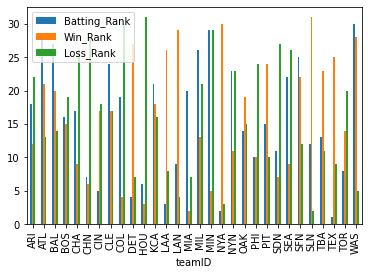

In [8]:
compare2_df = pd.DataFrame()
compare2_df['Batting_Rank'] = batting_average_df['H'].rank(method='max')
compare2_df['Win_Rank'] = wins_team_df['W'].rank(method='max')
compare2_df['Loss_Rank'] = loss_team_df['L'].rank(method='max')
compare2_df.plot.bar()

### In the year of 2011-2015, Is a player’s batting performance related to his team’s win-loss record?

According to the graph, yes!
Higher batting rank leads to higher wins and vice-versa

### Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015, sort them in a descending order. A lower ERA indicates a better pitching performance.

In [9]:
era_df = pitching_df[((pitching_df['yearID']>=2011) & 
                   (pitching_df['yearID']<=2015))].dropna()
era_avg_df = era_df.groupby(['teamID'], as_index = True)[['ERA']].mean()
era_avg_df.sort_values('ERA', ascending = False)

,ERA
teamID,
KCA,8.979565
CHA,7.137200
DET,7.068000
NYA,6.732121
CIN,6.704400
LAA,6.426667
SLN,5.978750
ARI,5.884800
COL,5.551923


### Create a visualization of your choice which will allow you to decide if a team’s win-loss record is related to its pitching performance. So is a team’s winning record related to its pitching performance?

<AxesSubplot:xlabel='teamID'>

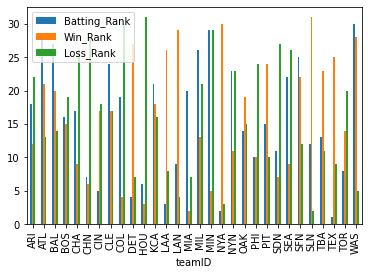

In [10]:
compare3_df = pd.DataFrame()
compare3_df['Batting_Rank'] = batting_average_df['H'].rank(method='max')
compare3_df['Win_Rank'] = wins_team_df['W'].rank(method='max')
compare3_df['Loss_Rank'] = loss_team_df['L'].rank(method='max')
compare3_df.plot.bar()

### In the year of 2011-2015, is a team’s win-loss record related to its pitching performance?

A lower ERA indicates a better pitching performance. Keeping that in mind we can say that better pitching performance certainly provides higher chance in securing the win.

# End of Homework 1_2